In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# 🐼 Pandas Worksheet: Exploratory Analysis
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐Bonus: Try out to process the large dataset



In [2]:
base_path =  '../week_10/ml-latest-small/'
ratings_df = pd.read_csv(base_path + 'ratings.csv')
movies_df = pd.read_csv(base_path + 'movies.csv')

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


---
## Ratings table

In [4]:
ratings_df.info()

# There seems to be no null values or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
ratings_df.isnull().sum()
# there are no missing vaules 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### How many unique users and movies are in the dataset?

In [6]:
len(ratings_df.userId.unique())

610

In [7]:
len(ratings_df.movieId.unique())

9724

#### a) What is the average rating, b) which rating appears the most?

In [8]:
# (a)
average_rating = ratings_df.rating.mean()
average_rating

3.501556983616962

In [9]:
# (b)
mode_rating = ratings_df.rating.mode()
mode_rating 

0    4.0
dtype: float64

In [69]:
# As the mean, median and mode are quite close. the rating data is close to a normal distribution function
ratings_df.rating.median()

3.5

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

<AxesSubplot:xlabel='rating', ylabel='Count'>

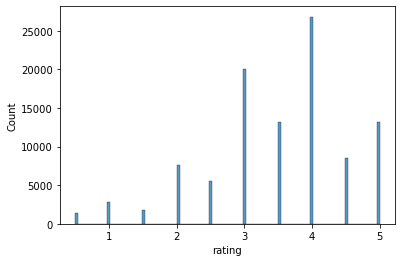

In [70]:
sns.histplot(ratings_df['rating'])

In [78]:

ratings_df.groupby(ratings_df['rating'])['rating'].count()

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

In [79]:
ratings_df.groupby(ratings_df['rating']==5)['rating'].count()

rating
False    87625
True     13211
Name: rating, dtype: int64

In [80]:
total_rating=ratings_df.groupby('rating')['rating'].count().sum()

In [81]:
percentage_5star_ratings = (ratings_df.groupby(ratings_df['rating']==5)['rating'].count()/total_rating)*100
percentage_5star_ratings

# The percentage of 5 star is 13.2 and others 87.62

rating
False    86.898528
True     13.101472
Name: rating, dtype: float64

In [90]:
# To get a relative frequency, i need to scale all to 1.
relative_table= pd.DataFrame(ratings_df.groupby(ratings_df['rating'])['rating'].count())
relative_table['frequency']= relative_table['rating']


In [93]:
relative_table = relative_table.drop(labels= 'rating', axis=1)

In [95]:
relative_table['relative_freq']= relative_table['frequency']/total_rating

In [97]:
relative_table['percentage_relative_freq']= relative_table['relative_freq']*100

In [98]:
relative_table

,frequency,relative_freq,percentage_relative_freq
rating,,,
0.5,1370,0.013586,1.358642
1.0,2811,0.027877,2.787695
1.5,1791,0.017762,1.776151
2.0,7551,0.074884,7.488397
2.5,5550,0.055040,5.503987
3.0,20047,0.198808,19.880797
3.5,13136,0.130271,13.027093
4.0,26818,0.265957,26.595660
4.5,8551,0.084801,8.480106


#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [99]:
ratings_df.groupby('userId')['rating'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [17]:
ratings_df.groupby('userId')['rating'].count().sort_values()

userId
442      20
406      20
147      20
194      20
569      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Name: rating, Length: 610, dtype: int64


#### How many users have rated more than 20 movies?

In [ ]:
# # I thought of two ways to do this
# 1. for loop
# 2. filtering though a dataframe
# # I will try both

In [18]:
# (1)
rating_per_user = list(ratings_df.groupby('userId')['rating'].count().sort_values())
rating_per_user

[20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 42,
 42,
 42,
 42,
 42,
 43,
 43,
 43,


In [100]:
count = 0
for rating in rating_per_user:
    if rating > 20:
        count += 1
#     else:
#         pass
print(count) 

596


In [109]:
# (2)
rating_temp = pd.DataFrame(ratings_df.groupby('userId')['rating'].count().sort_values())
rating_temp

,rating
userId,
442,20
406,20
147,20
194,20
569,20
...,...
274,1346
448,1864
474,2108


In [107]:
rating_temp[rating_temp['rating']>20]

,rating
userId,
26,21
87,21
547,21
281,21
507,21
...,...
274,1346
448,1864
474,2108


In [108]:
len(rating_temp[rating_temp['rating']>20])

596

In [110]:
# both approach gave me the same answer. the number is 596

#### a) How many movies rated the user with the most/ least ratings? b) What is the *median* number of ratings?

- use your results from the previous question

In [20]:
ratings_df.groupby('userId')['rating'].count().sort_values().min()

20

In [21]:
# 20 is the minimum number of movies rated and it is by several users (14 users to be precise)

In [22]:
ratings_df.groupby('userId')['rating'].count().sort_values().max()

2698

In [23]:
# 2698 is the mmaximum number of movies rated and it is by user 414 

In [24]:
ratings_df.groupby('userId')['rating'].count().sort_values().mode()

0    21
dtype: int64

In [25]:
# most users rated 21 movies

#### Draw a histogram or density plot of the distribution of the number of ratings per user! How would you characterize the distribution?

- use your results from the previous question
- Hint: `sns.histplot()`

<AxesSubplot:xlabel='rating', ylabel='Count'>

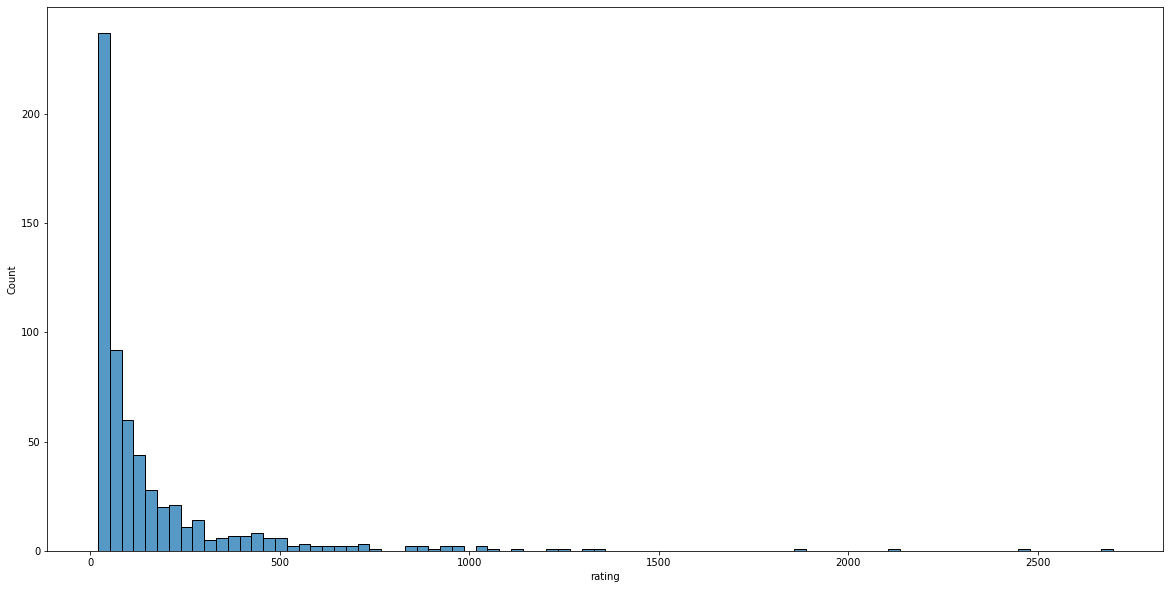

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(ratings_df.groupby('userId')['rating'].count())


#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [27]:
ratings_df.groupby('userId')['rating'].count().mean()

165.30491803278687

#### Which user gave the worst ratings on average, which user gave the best ratings?

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

In [28]:
ratings_df.groupby('userId')['rating'].mean().sort_values()

# User 442 gave the worst rating and user 53 gave the best rating

userId
442    1.275000
139    2.144330
508    2.145833
153    2.217877
567    2.245455
         ...   
30     4.735294
25     4.807692
515    4.846154
251    4.869565
53     5.000000
Name: rating, Length: 610, dtype: float64

#### Plot the distribution of average ratings!

<AxesSubplot:xlabel='rating', ylabel='Count'>

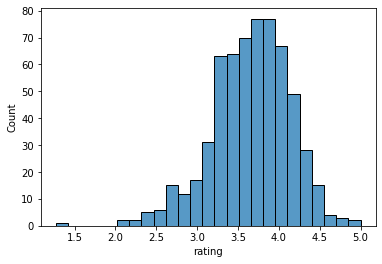

In [29]:
sns.histplot(ratings_df.groupby('userId')['rating'].mean().sort_values())

In [112]:
# If I filter out users that have rated less than 40 movies, let's see

pandas.core.frame.DataFrame

#### ⭐*Bonus*: Are users who have given more ratings also stricter?

- Derive the correlation between the average rating and the number of ratings per user!

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [30]:
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [31]:
movies_df.isnull().sum()
# There seems to be no missing value

movieId    0
title      0
genres     0
dtype: int64

In [32]:
movies_df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
len(movies_df['title'].unique())==len(movies_df)

False

In [34]:
len(movies_df['title'].unique())

9737

In [35]:
len(movies_df)

9742

In [36]:
movies_df['title'].value_counts().head(10)

War of the Worlds (2005)                                2
Saturn 3 (1980)                                         2
Eros (2004)                                             2
Emma (1996)                                             2
Confessions of a Dangerous Mind (2002)                  2
Unprecedented: The 2000 Presidential Election (2002)    1
Equus (1977)                                            1
Sky High (2005)                                         1
Best Seller (1987)                                      1
Annie Hall (1977)                                       1
Name: title, dtype: int64

In [37]:
# Five movies are duplicated 

In [38]:
movies_df.drop_duplicates(subset=['title'], inplace=True)

In [39]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

#### ⭐Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [40]:
movies_df['movie_year']=movies_df['title'].str.extract(r'(\d{4})')
movies_df

,movieId,title,genres,movie_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [41]:
movies_df.info()
# several movie_years have missing_value ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9737 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieId     9737 non-null   int64 
 1   title       9737 non-null   object
 2   genres      9737 non-null   object
 3   movie_year  9725 non-null   object
dtypes: int64(1), object(3)
memory usage: 380.4+ KB


In [42]:
movies_df.isnull().sum()

movieId        0
title          0
genres         0
movie_year    12
dtype: int64

#### ⭐Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [43]:
movies_df['genres'].str.split('|')

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9737, dtype: object

In [44]:

max=1

for element in movies_df['genres'].str.split('|'):
    if max < len(element):
        max=len(element)
print(f'the highest number of genre per movie is {max}')


the highest number of genre per movie is 10


In [45]:
movies_df['genres'].str.split('|').explode()

0       Adventure
0       Animation
0        Children
0          Comedy
0         Fantasy
          ...    
9738      Fantasy
9739        Drama
9740       Action
9740    Animation
9741       Comedy
Name: genres, Length: 22072, dtype: object

In [46]:
genre_per_movie_df = pd.DataFrame(movies_df['genres'].str.split('|').explode())
genre_per_movie_df


,genres
0,Adventure
0,Animation
0,Children
0,Comedy
0,Fantasy
...,...
9738,Fantasy
9739,Drama
9740,Action
9740,Animation


In [47]:
genre_per_movie_df.index.value_counts()
# similar to for loop above, the value count returns index is 7441. I will use df.loc to get get the ID of the movie

7441    10
5556     8
6462     7
3460     7
7467     7
        ..
3994     1
8104     1
5013     1
1393     1
2230     1
Length: 9737, dtype: int64

In [48]:
movies_df.loc[7741]

movieId                        90866
title                    Hugo (2011)
genres        Children|Drama|Mystery
movie_year                      2011
Name: 7741, dtype: object

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [49]:
merged_df= ratings_df.merge(movies_df, on = 'movieId', how='inner')
merged_df

,userId,movieId,rating,timestamp,title,genres,movie_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...,...
100825,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,1997
100826,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1971
100827,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,2005
100828,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,2016


In [50]:
merged_df['movie_year'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
100825    False
100826    False
100827    False
100828    False
100829    False
Name: movie_year, Length: 100830, dtype: bool

#### Count the number of ratings per movie title!

In [51]:
merged_df.groupby('movieId')['rating'].count()

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9719, dtype: int64

#### Use your previous results: What are the top 10 most rated movies in the dataset?

In [52]:
merged_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

#### Calculate the average rating per movie title!

In [53]:
merged_df.groupby('title')['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

#### Make a visualization of the distribution of average ratings per movie

<AxesSubplot:xlabel='rating', ylabel='Count'>

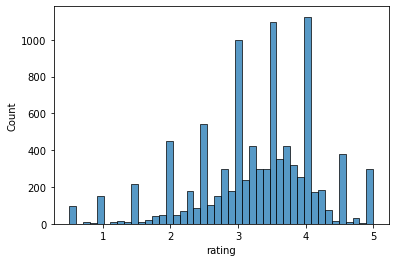

In [54]:
sns.histplot(merged_df.groupby('title')['rating'].mean())

#### Which movie was rated the best? Which movie was rated the worst?

- ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? 

In [55]:
merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(1)

title
Tom Segura: Mostly Stories (2016)    5.0
Name: rating, dtype: float64

In [56]:
merged_df.groupby('title')['rating'].mean().sort_values().head(1)

title
Rust and Bone (De rouille et d'os) (2012)    0.5
Name: rating, dtype: float64

#### ⭐*Bonus*: Did the average rating of movies improve over time? 

- Use your results from the previous ⭐bonus exercises
- Visualize your findings in a nice plot

In [57]:
# This question can be understood in two ways. over time may mean...  (1) the date the movie was made and (2) the date the user made the review
# I personally interpretted it as the second. But since you said use your previous bonus exercise, you may be refereing to 1. so, I will do both but reframe the question
# # for 2, I will first convert timestamp to datetime so i can grou by the year they gave the review

In [58]:
# (1) Does the year the movie was made impact the rating?

In [59]:
merged_df.groupby('movie_year')['rating'].mean()

movie_year
1000    2.714286
1138    3.785714
1408    3.160000
1492    2.500000
1600    2.750000
          ...   
2018    3.451087
2046    4.071429
2048    3.500000
2049    3.805556
3000    3.315217
Name: rating, Length: 117, dtype: float64

In [60]:
movie_year_rating = pd.DataFrame(merged_df.groupby('movie_year')['rating'].mean())
movie_year_rating

,rating
movie_year,
1000,2.714286
1138,3.785714
1408,3.160000
1492,2.500000
1600,2.750000
...,...
2018,3.451087
2046,4.071429
2048,3.500000


Text(0.5, 0, 'year of movie production')

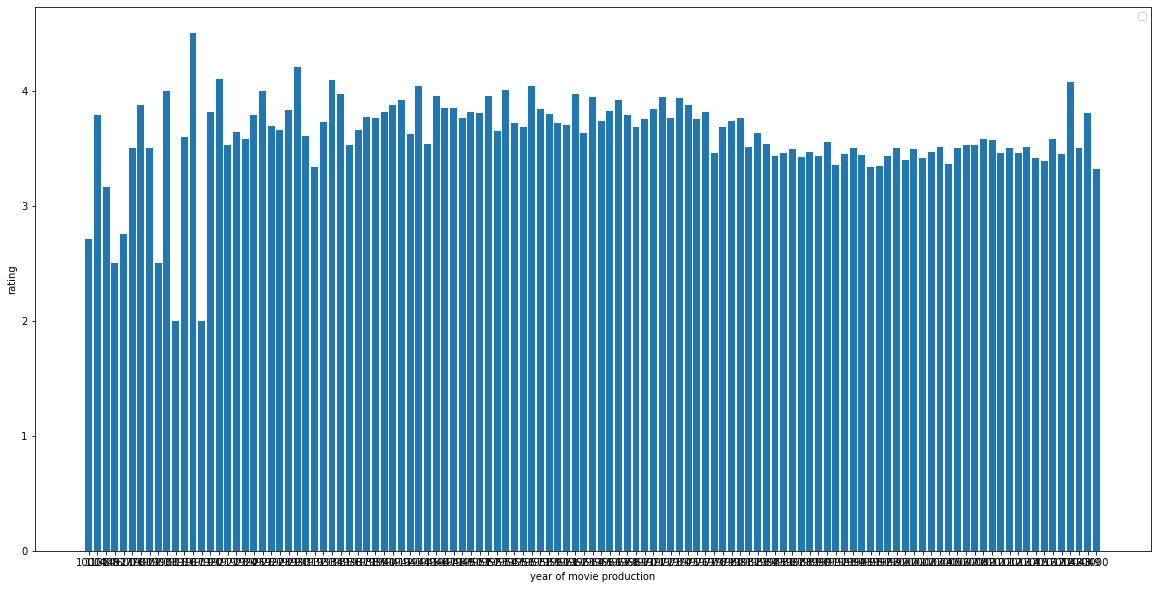

In [61]:
plt.figure(figsize=(20,10))
plt.legend('Movie rating based on year of production')
plt.bar(movie_year_rating.index, movie_year_rating.rating)
plt.ylabel('rating')

plt.xlabel('year of movie production')
# I do not see an obvious trend based on the year the movies were made. Well, except for a few bad ratings for early movie

In [62]:
# (2) Rating based the date the user made the review. To make grouping easier, I will covert timestamp to datetime and extract year

In [63]:
merged_df['review_date'] = pd.to_datetime(merged_df['timestamp'], unit='s')


In [64]:
merged_df

,userId,movieId,rating,timestamp,title,genres,movie_year,review_date
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2000-07-30 18:45:03
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1996-11-08 06:36:02
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2005-01-25 06:52:26
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2017-11-13 12:59:30
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2011-05-18 05:28:03
...,...,...,...,...,...,...,...,...
100825,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,1997,2016-11-19 08:55:49
100826,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1971,2016-11-19 08:43:18
100827,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,2005,2017-05-03 20:53:14
100828,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,2016,2017-05-03 21:59:49


In [65]:
merged_df['review_year'] = merged_df['review_date'].dt.year
merged_df

,userId,movieId,rating,timestamp,title,genres,movie_year,review_date,review_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2000-07-30 18:45:03,2000
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1996-11-08 06:36:02,1996
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2005-01-25 06:52:26,2005
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2017-11-13 12:59:30,2017
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2011-05-18 05:28:03,2011
...,...,...,...,...,...,...,...,...,...
100825,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,1997,2016-11-19 08:55:49,2016
100826,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1971,2016-11-19 08:43:18,2016
100827,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,2005,2017-05-03 20:53:14,2017
100828,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,2016,2017-05-03 21:59:49,2017


In [66]:
merged_df.groupby('review_year')['rating'].mean()

review_year
1996    3.535927
1997    3.727557
1998    3.435897
1999    3.772448
2000    3.392506
2001    3.512239
2002    3.606958
2003    3.499377
2004    3.506099
2005    3.431533
2006    3.487928
2007    3.309039
2008    3.657011
2009    3.392471
2010    3.463494
2011    3.784024
2012    3.641323
2013    3.877404
2014    3.510771
2015    3.513832
2016    3.686334
2017    3.348725
2018    3.389105
Name: rating, dtype: float64

<BarContainer object of 23 artists>

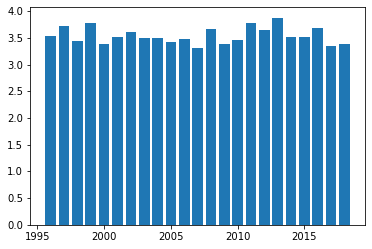

In [67]:
plt.bar(merged_df.groupby('review_year')['rating'].mean().index, merged_df.groupby('review_year')['rating'].mean())
# again, year that review was made seems to be irrelivant. So, the answer is no. Review did nto get better over time. 